**Aman Dubal T076**

Aim : Data Visualization and Storytelling
1. Create meaningful visualizations using data visualization tools
2. Combine multiple visualizations to tell a compelling data story.
3. Present the findings and insights in a clear and concise manner.

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

Step 1: Load & Inspect Data

In [ ]:

df = pd.read_csv("globalAirQuality.csv")
print("First 5 rows:")
print(df.head())


First 5 rows:
                    timestamp country      city  latitude  longitude    pm25  \
0  2025-11-04 18:25:17.554219      US  New York    40.713    -74.006  50.295   
1  2025-11-04 19:25:17.554219      US  New York    40.713    -74.006  32.083   
2  2025-11-04 20:25:17.554219      US  New York    40.713    -74.006  42.250   
3  2025-11-04 21:25:17.554219      US  New York    40.713    -74.006  30.403   
4  2025-11-04 22:25:17.554219      US  New York    40.713    -74.006  21.083   

      pm10     no2    so2      o3     co  aqi  temperature  humidity  \
0  108.938  27.998  6.539  52.568  1.096  108       18.504    70.168   
1   63.043  36.120  4.021  43.536  1.075   90        5.838    80.088   
2   82.553  26.935  9.538  23.320  0.977   84       31.833    62.783   
3   79.951  63.536  7.609  31.369  0.230  158       23.140    89.153   
4   66.423  38.997  6.919  45.615  1.085   97       13.632    76.499   

   wind_speed  
0       3.725  
1       8.969  
2       9.650  
3       

In [ ]:
print("\nData Info:")
print(df.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    18000 non-null  object 
 1   country      18000 non-null  object 
 2   city         18000 non-null  object 
 3   latitude     18000 non-null  float64
 4   longitude    18000 non-null  float64
 5   pm25         18000 non-null  float64
 6   pm10         18000 non-null  float64
 7   no2          18000 non-null  float64
 8   so2          18000 non-null  float64
 9   o3           18000 non-null  float64
 10  co           18000 non-null  float64
 11  aqi          18000 non-null  int64  
 12  temperature  18000 non-null  float64
 13  humidity     18000 non-null  float64
 14  wind_speed   18000 non-null  float64
dtypes: float64(11), int64(1), object(3)
memory usage: 2.1+ MB
None


In [ ]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
timestamp      0
country        0
city           0
latitude       0
longitude      0
pm25           0
pm10           0
no2            0
so2            0
o3             0
co             0
aqi            0
temperature    0
humidity       0
wind_speed     0
dtype: int64


Step 2: Basic Pre-processing

In [ ]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols     = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("\nNumeric columns:", numeric_cols)
print("Categorical columns:", cat_cols)

# Fill numeric missing values with median
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical missing values with mode (most frequent)
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values after cleaning:")
print(df.isnull().sum())

# Helper: try to detect common air-quality columns if present
def pick_col(candidates, fallback_list):
    for c in candidates:
        if c in df.columns:
            return c
    # fallback to first numeric if candidate not found
    return fallback_list[0] if fallback_list else None

pm25_col   = pick_col(['pm2_5', 'PM2.5', 'PM2_5', 'PM25'], numeric_cols)
pm10_col   = pick_col(['pm10', 'PM10'], numeric_cols)
no2_col    = pick_col(['no2', 'NO2'], numeric_cols)
aqi_col    = pick_col(['aqi', 'AQI', 'Air_Quality_Index'], numeric_cols)
year_col   = pick_col(['year', 'Year', 'YEAR'], df.columns.tolist())

country_col = pick_col(['country', 'Country', 'COUNTRY'], cat_cols)
city_col    = pick_col(['city', 'City', 'CITY'], cat_cols)

print("\nChosen columns for plots:")
print("PM2.5 column :", pm25_col)
print("PM10 column  :", pm10_col)
print("NO2 column   :", no2_col)
print("AQI column   :", aqi_col)
print("Year column  :", year_col)
print("Country col  :", country_col)
print("City col     :", city_col)



Numeric columns: ['latitude', 'longitude', 'pm25', 'pm10', 'no2', 'so2', 'o3', 'co', 'aqi', 'temperature', 'humidity', 'wind_speed']
Categorical columns: ['timestamp', 'country', 'city']

Missing values after cleaning:
timestamp      0
country        0
city           0
latitude       0
longitude      0
pm25           0
pm10           0
no2            0
so2            0
o3             0
co             0
aqi            0
temperature    0
humidity       0
wind_speed     0
dtype: int64

Chosen columns for plots:
PM2.5 column : latitude
PM10 column  : pm10
NO2 column   : no2
AQI column   : aqi
Year column  : timestamp
Country col  : country
City col     : city


Step 3: Individual Visualizations (Single)

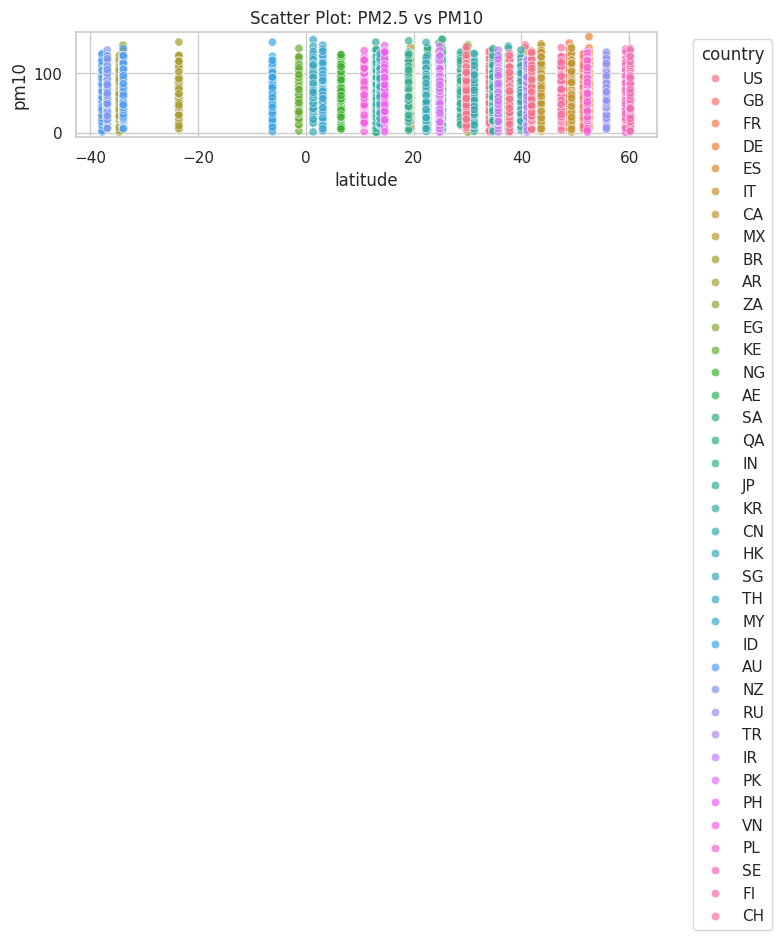

In [ ]:
# 3.1 Scatter Plot – relationship between PM2.5 and PM10
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=pm25_col, y=pm10_col, hue=country_col, alpha=0.7)
plt.title("Scatter Plot: PM2.5 vs PM10")
plt.xlabel(pm25_col)
plt.ylabel(pm10_col)
plt.legend(title=country_col, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


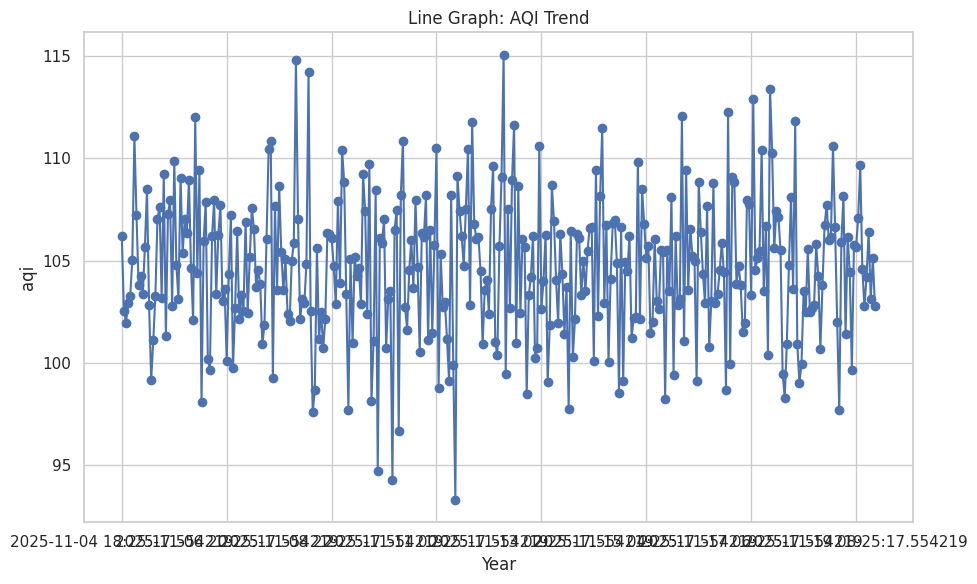

In [ ]:

# 3.2 Line Graph – AQI trend over time (or index if no year column)
plt.figure(figsize=(10, 6))
if year_col is not None:
    # average AQI per year
    aqi_by_year = df.groupby(year_col)[aqi_col].mean()
    aqi_by_year.plot(kind='line', marker='o')
    plt.xlabel("Year")
else:
    # AQI over index
    plt.plot(df[aqi_col].reset_index(drop=True))
    plt.xlabel("Record Index")

plt.title("Line Graph: AQI Trend")
plt.ylabel(aqi_col)
plt.grid(True)
plt.tight_layout()
plt.show()

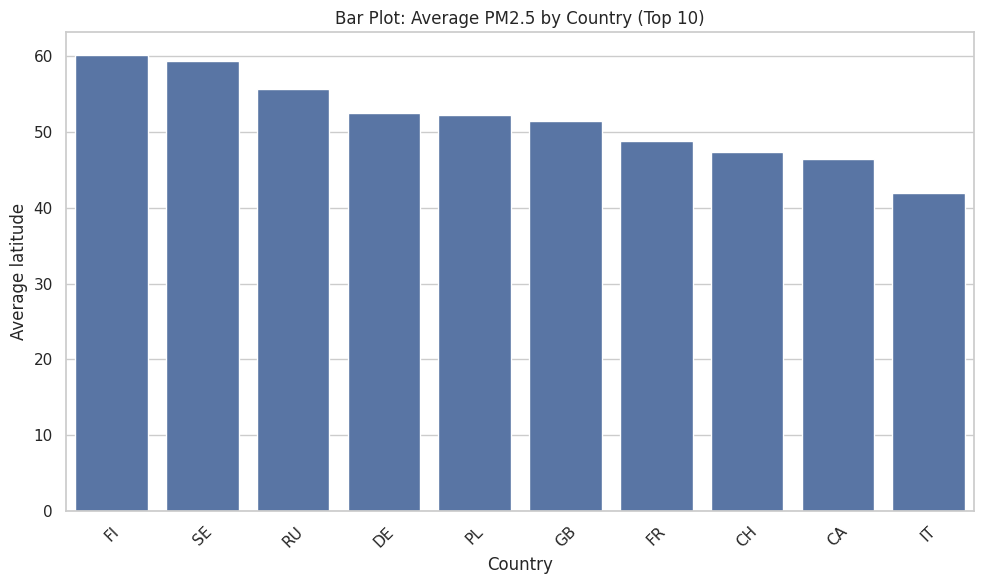

In [ ]:
# 3.3 Bar Plot – Average PM2.5 by Country (top 10)
plt.figure(figsize=(10, 6))
if country_col is not None:
    pm25_by_country = df.groupby(country_col)[pm25_col].mean().sort_values(ascending=False).head(10)
    sns.barplot(x=pm25_by_country.index, y=pm25_by_country.values)
    plt.title("Bar Plot: Average PM2.5 by Country (Top 10)")
    plt.xlabel("Country")
    plt.ylabel(f"Average {pm25_col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


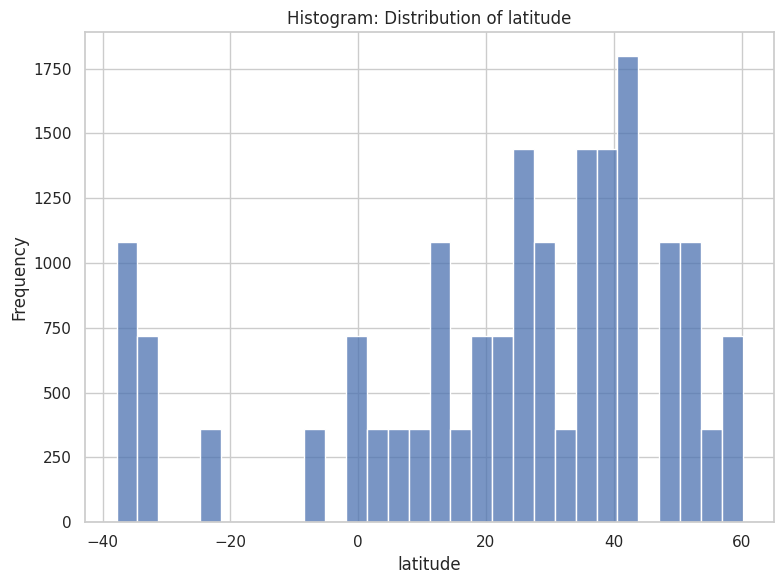

In [ ]:
# 3.4 Histogram – distribution of PM2.5
plt.figure(figsize=(8, 6))
sns.histplot(df[pm25_col], bins=30, kde=False)
plt.title(f"Histogram: Distribution of {pm25_col}")
plt.xlabel(pm25_col)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

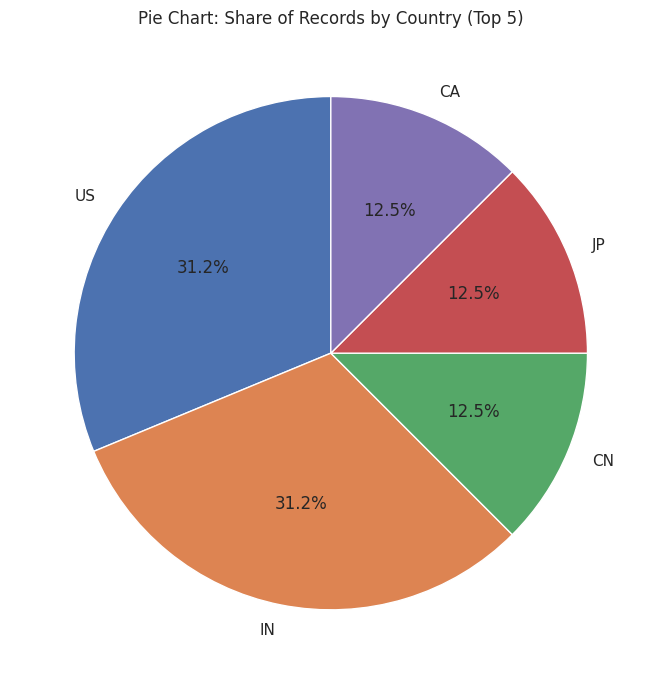

In [ ]:
# 3.5 Pie Chart – Share of Records by Region/Country (top 5)
plt.figure(figsize=(7, 7))
if country_col is not None:
    country_counts = df[country_col].value_counts().head(5)
    plt.pie(country_counts.values,
            labels=country_counts.index,
            autopct='%1.1f%%',
            startangle=90)
    plt.title("Pie Chart: Share of Records by Country (Top 5)")
    plt.tight_layout()
    plt.show()


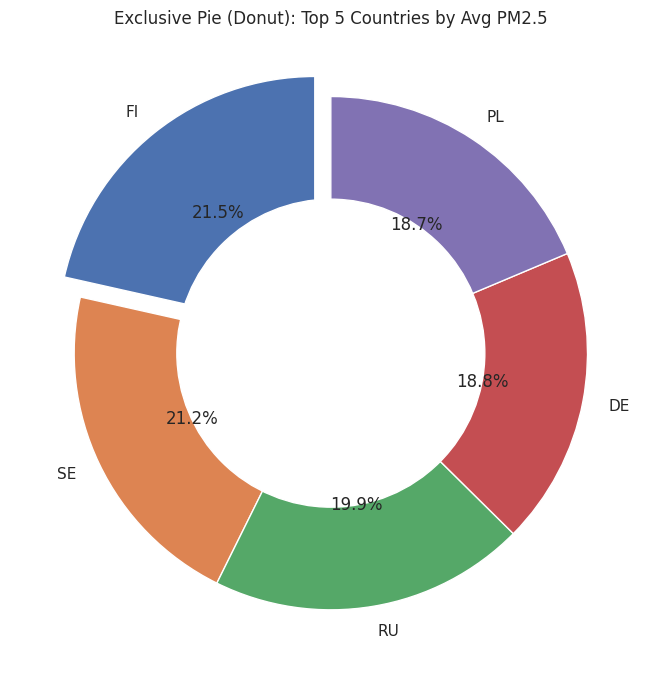

In [ ]:

# 3.6 Exclusive Pie Chart – Donut / Exploded Pie for top 5 polluted countries by PM2.5
if country_col is not None:
    plt.figure(figsize=(7, 7))
    top_pm25 = df.groupby(country_col)[pm25_col].mean().sort_values(ascending=False).head(5)
    values = top_pm25.values
    labels = top_pm25.index

    # Explode the highest one
    explode = [0.1] + [0]* (len(values)-1)

    wedges, texts, autotexts = plt.pie(values,
                                       labels=labels,
                                       autopct='%1.1f%%',
                                       startangle=90,
                                       explode=explode)

    # Donut effect
    centre_circle = plt.Circle((0, 0), 0.60, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.title("Exclusive Pie (Donut): Top 5 Countries by Avg PM2.5")
    plt.tight_layout()
    plt.show()


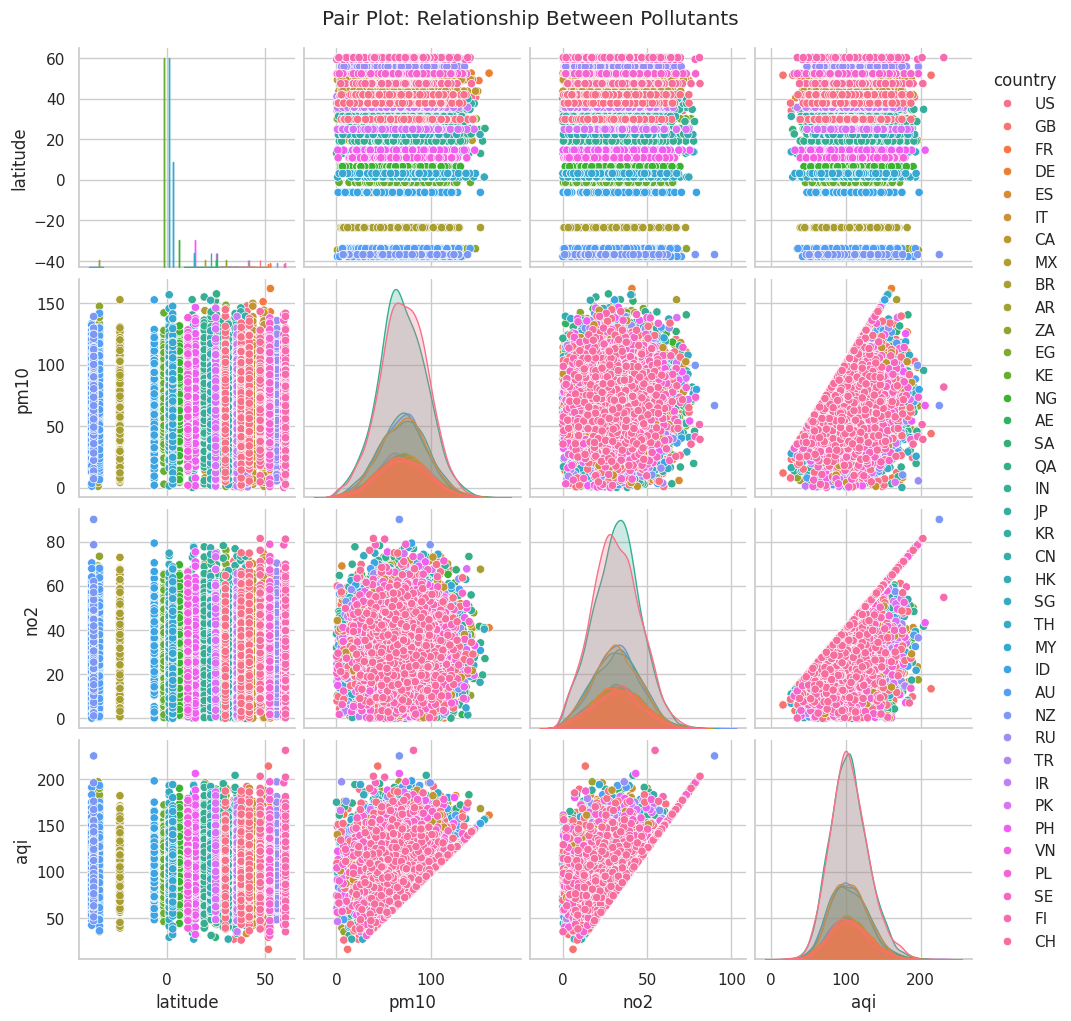

In [ ]:

# 3.7 Pair Plot – relationships between main pollutants
# pick up to 4 numeric columns for pairplot
pairplot_cols = [col for col in [pm25_col, pm10_col, no2_col, aqi_col] if col is not None]
pairplot_cols = list(dict.fromkeys(pairplot_cols))  # remove duplicates

sns.pairplot(df[pairplot_cols + ([country_col] if country_col else [])],
             hue=country_col if country_col else None)
plt.suptitle("Pair Plot: Relationship Between Pollutants", y=1.02)
plt.show()



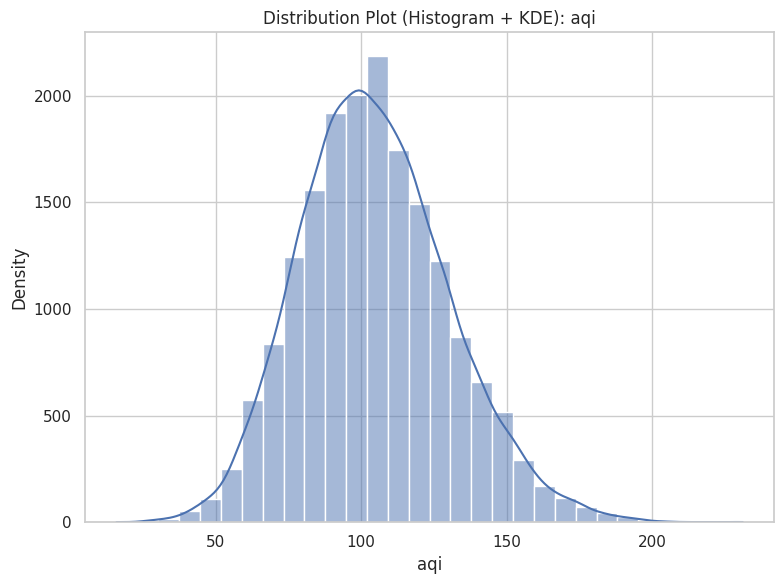

In [ ]:
# 3.8 Distribution Plot – KDE for AQI
plt.figure(figsize=(8, 6))
sns.histplot(df[aqi_col], kde=True, bins=30)
plt.title(f"Distribution Plot (Histogram + KDE): {aqi_col}")
plt.xlabel(aqi_col)
plt.ylabel("Density")
plt.tight_layout()
plt.show()



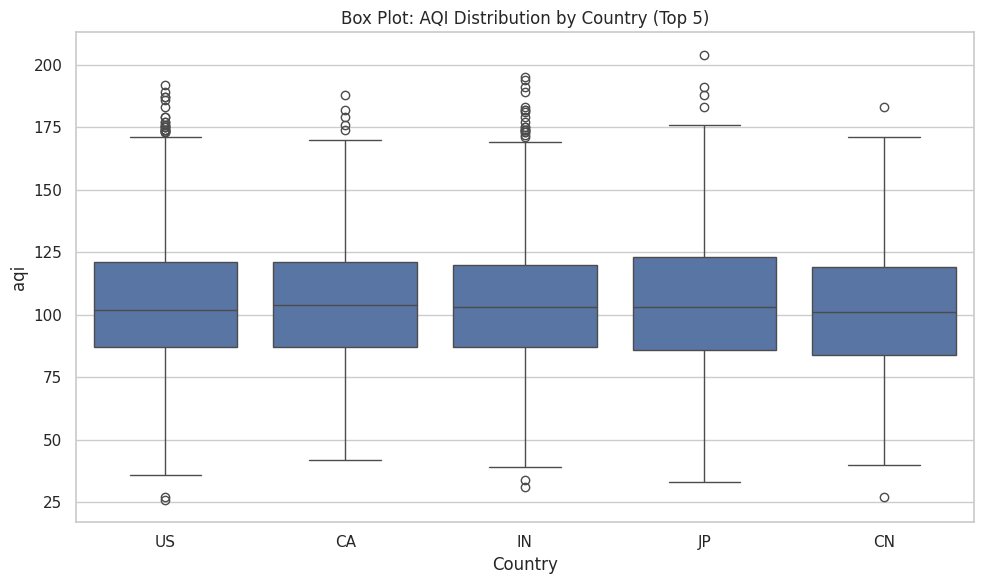

In [ ]:
# 3.9 Box Plot – AQI by Country (top 5)
if country_col is not None:
    plt.figure(figsize=(10, 6))
    top_countries = df[country_col].value_counts().head(5).index
    sns.boxplot(data=df[df[country_col].isin(top_countries)],
                x=country_col, y=aqi_col)
    plt.title("Box Plot: AQI Distribution by Country (Top 5)")
    plt.xlabel("Country")
    plt.ylabel(aqi_col)
    plt.tight_layout()
    plt.show()

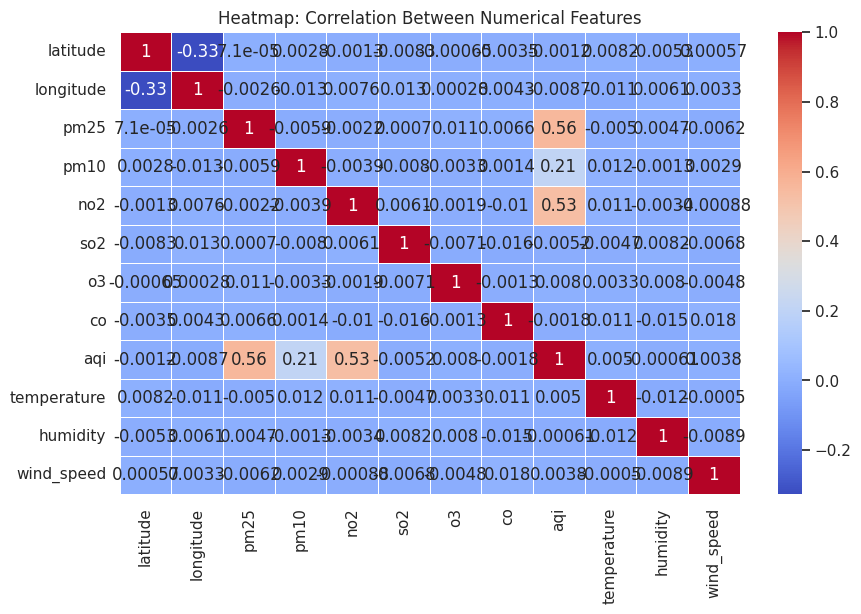

In [ ]:
# Heatmap (Correlation Matrix)
plt.figure(figsize=(10, 6))
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap: Correlation Between Numerical Features")
plt.show()
